In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns

In [3]:
font= fm.FontProperties(fname=r'C:\Windows\Fonts\gulim.ttc',size=18).get_name()
rc('font',family=font)

In [4]:
df=pd.read_csv('../pandaslib/data/demo.csv')

In [5]:
df.shape

(3749370, 6)

In [6]:
df.head()

date_time  time_taken          c_ip  sc_status  s_action  \
0  2005-04-30 17:16:14          95  45.114.2.130        200  TCP_MISS   
1  2005-04-30 17:16:14          96  45.114.2.130        200  TCP_MISS   
2  2005-04-30 17:16:14          95  45.114.2.130        200  TCP_MISS   
3  2005-04-30 17:16:14          94  45.114.2.130        200  TCP_MISS   
4  2005-04-30 17:16:14          94  45.114.2.130        200  TCP_MISS   

  cs_method  
0       GET  
1       GET  
2       GET  
3       GET  
4       GET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749370 entries, 0 to 3749369
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   date_time   object
 1   time_taken  int64 
 2   c_ip        object
 3   sc_status   int64 
 4   s_action    object
 5   cs_method   object
dtypes: int64(2), object(4)
memory usage: 171.6+ MB


In [8]:
df.isnull().sum()

date_time     0
time_taken    0
c_ip          0
sc_status     0
s_action      0
cs_method     0
dtype: int64

In [9]:
df.columns

Index(['date_time', 'time_taken', 'c_ip', 'sc_status', 's_action',
       'cs_method'],
      dtype='object')

In [10]:
#3749370갯수의 데이타에서 요청 IP는 몇개인지
df['c_ip'].unique()

array(['45.114.2.130', '45.0.0.76', '45.0.0.184', ..., '45.0.17.232',
       '45.0.18.252', '45.0.13.194'], dtype=object)

In [11]:
df['c_ip'].nunique()#2,793개의 아이피에서 3,749,370번의 요청이 들어옴

2793

In [12]:
#응답시간의 통계치 보기
df['time_taken'].describe()

count    3.749370e+06
mean     5.030452e+02
std      7.644225e+04
min      1.000000e+00
25%      1.000000e+00
50%      2.600000e+01
75%      1.310000e+02
max      7.295814e+07
Name: time_taken, dtype: float64

In [13]:
#응답 코드 분석
df['sc_status'].unique()

array([200, 206, 301, 404, 503, 302, 400, 304, 401, 204, 403, 207, 201,
       303, 500, 408, 410, 307, 504, 405, 502, 501, 300, 422, 416, 406,
       402], dtype=int64)

In [14]:
#응답코드별 빈도수
df['sc_status'].value_counts()

200    2549947
304     821780
302     166075
404      62859
401      55195
400      28261
206      15449
301      13535
207      13130
503      11157
204       4816
403       3044
500       1694
303       1185
416        380
201        352
504        200
408        149
405         63
300         40
410         21
307         18
502          9
501          5
422          4
406          1
402          1
Name: sc_status, dtype: int64

In [15]:
df_status=df.query('sc_status==200 | sc_status==404 | sc_status==401 | sc_status==500')

In [16]:
df_status.groupby('sc_status').size()
df_status

date_time  time_taken          c_ip  sc_status  \
0        2005-04-30 17:16:14          95  45.114.2.130        200   
1        2005-04-30 17:16:14          96  45.114.2.130        200   
2        2005-04-30 17:16:14          95  45.114.2.130        200   
3        2005-04-30 17:16:14          94  45.114.2.130        200   
4        2005-04-30 17:16:14          94  45.114.2.130        200   
...                      ...         ...           ...        ...   
3749365  2005-05-06 10:45:35         179  45.17.17.200        200   
3749366  2005-05-06 10:45:45         169  45.17.17.200        200   
3749367  2005-05-06 10:45:55         168  45.17.17.200        200   
3749368  2005-05-06 10:46:05         175  45.17.17.200        200   
3749369  2005-05-06 10:46:15         168  45.17.17.200        200   

            s_action cs_method  
0           TCP_MISS       GET  
1           TCP_MISS       GET  
2           TCP_MISS       GET  
3           TCP_MISS       GET  
4           TCP_MISS       GET  
...              ...       ...  
3749365  TCP_NC_MISS       GET  
3749366  TCP_NC_MISS       GET  
3749367  TCP_NC_MISS       GET  
3749368  TCP_NC_MISS       GET  
3749369  TCP_NC_MISS       GET  

[2669695 rows x 6 columns]

<AxesSubplot:xlabel='sc_status', ylabel='count'>

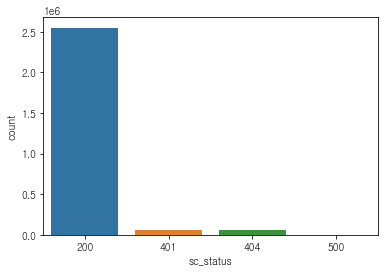

In [17]:
sns.countplot(x='sc_status',data=df_status)

In [18]:
#HTTP METHOD 분석
df['cs_method'].unique()

array(['GET', 'POST', 'HEAD', 'SEARCH', 'MOVE', 'BMOVE', 'POLL', 'PUT',
       'LOCK', 'DELETE', 'MKCOL', 'UNLOCK'], dtype=object)

In [19]:
method=df['cs_method'].value_counts()
method

GET       3627623
POST        75092
HEAD        16982
POLL        14166
SEARCH       8989
BMOVE        5659
MOVE          744
DELETE         64
PUT            24
MKCOL          16
LOCK            6
UNLOCK          5
Name: cs_method, dtype: int64

In [20]:
#시리즈를 데이타프레임으로 변경
method=method.reset_index()
method

index  cs_method
0      GET    3627623
1     POST      75092
2     HEAD      16982
3     POLL      14166
4   SEARCH       8989
5    BMOVE       5659
6     MOVE        744
7   DELETE         64
8      PUT         24
9    MKCOL         16
10    LOCK          6
11  UNLOCK          5

In [21]:
#컬럼명 변경
method.columns=['http_method','request']

In [22]:
method=method.query('http_method=="GET" | http_method=="POST" | http_method=="DELETE" | http_method=="PUT"')

In [23]:
method

http_method  request
0         GET  3627623
1        POST    75092
7      DELETE       64
8         PUT       24

<AxesSubplot:xlabel='http_method', ylabel='request'>

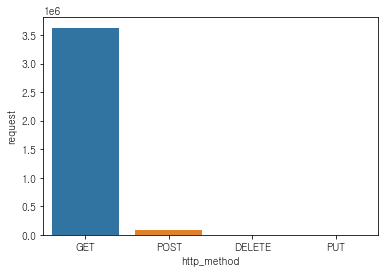

In [27]:
sns.barplot(x='http_method',y='request',data=method)

<AxesSubplot:xlabel='http_method', ylabel='count'>

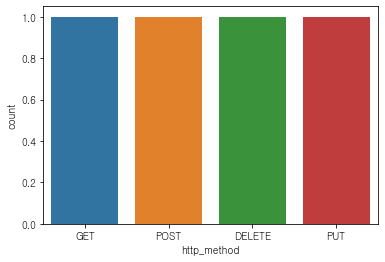

In [28]:
#countplot는 http_method컬럼의 값별로 빈도수로  그린다 즉 GET=1,POST=1,DELETE=1,PUT=1
sns.countplot(x='http_method',data=method)